In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid

%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

In [2]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"

In [3]:
fly = "fly_094"
directory = os.path.join(dataset_path,fly,'func_0')
clustering_dir = os.path.join(directory, 'super_voxels')
if not os.path.exists(clustering_dir):
        os.mkdir(clustering_dir)

In [4]:
## FINALLY, THIS ONE WORKS
brain_file = os.path.join(directory, 'brain_zscored_green_high_pass_masked.nii')
brain = np.array(nib.load(brain_file).get_data(), copy=True)

In [5]:
one_slice = brain[:,:,20,:].reshape(-1, brain.shape[-1])

In [6]:
one_slice.shape

(32768, 3384)

In [7]:
brain.shape

(256, 128, 49, 3384)

In [84]:
timestamps = bbb.load_timestamps(os.path.join(directory, 'imaging'))
fictrac_raw = bbb.load_fictrac(os.path.join(directory, 'fictrac'))


~~ load_timestamps ~~
Trying to load timestamp data from hdf5 file.
Success.
load_timestamps done. Duration: 60.39 ms

~~ load_fictrac ~~
load_fictrac done. Duration: 3.05 sec


In [107]:
resolution = 100 #desired resolution in ms
expt_len = 1000*30*60
fps = 50 #of fictrac camera
behaviors = ['dRotLabY', 'dRotLabZ']
fictrac = {}
for behavior in behaviors:
    if behavior == 'dRotLabY': short = 'Y'
    elif behavior == 'dRotLabZ': short = 'Z'
    fictrac[short] = bbb.smooth_and_interp_fictrac(fictrac_raw,
                                                   fps,
                                                   resolution,
                                                   expt_len,
                                                   behavior,
                                                   timestamps=timestamps,
                                                   smoothing=51)
    fictrac[short] = fictrac[short]/np.std(fictrac[short])
xnew = np.arange(0,expt_len,resolution)

In [10]:
# for behavior in ['Y', 'Z']:
#     fictrac_std = np.std(fictrac[behavior])
#     fictrac[behavior] = np.divide(fictrac[behavior],fictrac_std)

In [ ]:
# LOOP
Y_glm = fictrac['Y']
#n_clusters = [9856,9000,8000,7000,6000,5000,4000,3000,2000,1500,1000,750,500,100,10,1]
#n_clusters = [77*128,5000,2000,1500,1000,750,500,100,1]
n_clusters = [8938]
#n_clusters = [1,1000,2000,4000]

#scores = {}
#maps = {}
#alphas = {}

for cluster in n_clusters[::-1]:
    t0 = time.time()
    print('working on cluster {}'.format(cluster))
    model = AgglomerativeClustering(n_clusters=cluster,
                                    memory=clustering_dir,
                                    linkage='ward',
                                    connectivity=connectivity)
    model = model.fit(one_slice_eroded)

    signals = []
    for cluster_num in range(cluster):
        cluster_indicies = np.where(model.labels_==cluster_num)[0]
        mean_signal = np.mean(one_slice_eroded[cluster_indicies,:], axis=0)
        signals.append(mean_signal)
    X_glm=np.asarray(signals).T

    modelglm = RidgeCV(alphas=[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])
    modelglm.fit(X_glm, Y_glm)
    
    colored_by_betas = np.zeros(77*128)
    for cluster_num in range(cluster):
        cluster_indicies = np.where(model.labels_==cluster_num)[0]
        colored_by_betas[cluster_indicies] = modelglm.coef_[cluster_num]
    colored_by_betas = colored_by_betas.reshape(77,128)
    
    maps[cluster] = colored_by_betas
    scores[cluster] = modelglm.score(X_glm, Y_glm)
    alphas[cluster] = modelglm.alpha_
    
    print('duration {:.0f}s'.format(time.time()-t0))

In [26]:
from sklearn.feature_extraction.image import grid_to_graph
connectivity = grid_to_graph(256,128)

In [27]:
n_clusters = 2000
model = AgglomerativeClustering(n_clusters=n_clusters,
                                memory=clustering_dir,
                                linkage='ward',
                                connectivity=connectivity)
model = model.fit(one_slice)

In [28]:
signals = []
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(model.labels_==cluster_num)[0]
    mean_signal = np.mean(one_slice[cluster_indicies,:], axis=0)
    signals.append(mean_signal)
signals=np.asarray(signals)

In [14]:
signals.shape

(2000, 3384)

In [ ]:
signals[0,:]

In [ ]:
corr_brain[i,j,z] = scipy.stats.pearsonr(fictrac_interp, brain[i,j,z,:])[0]

In [41]:
fictrac['Y'].shape

(3384,)

In [59]:
out = np.append(accel_Y,0)

In [60]:
len(out)

180000

In [83]:
len(fictrac['Y'])

180000

In [87]:
len(fictrac['Y'])

180000

In [93]:
len(accel_Y)

179999

In [104]:
### For Acceleration ###

### First, get high_res behavior ###
resolution = 10 #desired resolution in ms
expt_len = 1000*30*60
fps = 50 #of fictrac camera
behaviors = ['dRotLabY', 'dRotLabZ']
fictrac = {}
for behavior in behaviors:
    if behavior == 'dRotLabY': short = 'Y'
    elif behavior == 'dRotLabZ': short = 'Z'
    fictrac[short] = bbb.smooth_and_interp_fictrac(fictrac_raw,
                                                   fps,
                                                   resolution,
                                                   expt_len,
                                                   behavior,
                                                   timestamps=None,
                                                   smoothing=51)
    fictrac[short] = fictrac[short]/np.std(fictrac[short])
xnew = np.arange(0,expt_len,resolution)

### Differentiate and smooth ###
accel = scipy.signal.savgol_filter(diff(fictrac['Z']),25,3)
accel = np.append(accel, 0)

### Interpolate to neural data ###
expt_len = 1000*30*60
fps = 100 #of fictrac camera
camera_rate = 1/fps * 1000 # camera frame rate in ms
x_original = np.arange(0,expt_len,camera_rate)
fictrac_interp_temp = interp1d(x_original, accel, bounds_error = False)
acl = fictrac_interp_temp(timestamps[:,20])
acl[-1] = 0

corrs = []
for i in range(n_clusters):
    corrs.append(scipy.stats.pearsonr(acl, signals[i,:])[0])
    
colored_by_betas = np.zeros(256*128)
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(model.labels_==cluster_num)[0]
    colored_by_betas[cluster_indicies] = corrs[cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)

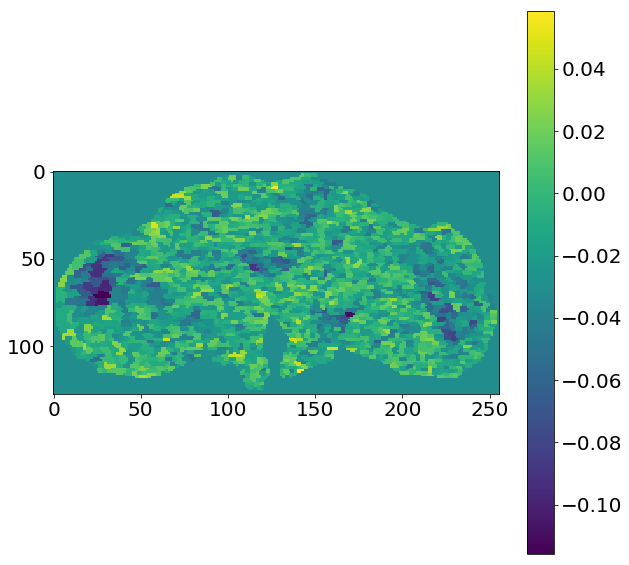

In [105]:
plt.figure(figsize=(10,10))
plt.imshow(colored_by_betas.T)
plt.colorbar()

In [108]:
corrs = []
for i in range(n_clusters):
    corrs.append(scipy.stats.pearsonr(fictrac['Y'], signals[i,:])[0])

In [113]:
colored_by_betas = np.zeros(256*128)
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(model.labels_==cluster_num)[0]
    #colored_by_betas[cluster_indicies] = np.random.randint(1,100) #assign corrs here instead.
    colored_by_betas[cluster_indicies] = corrs[cluster_num] #assign corrs here instead.
colored_by_betas = colored_by_betas.reshape(256,128)

In [112]:
colored_by_betas.shape

(256, 128)

In [118]:
np.argmax(corrs)

1557

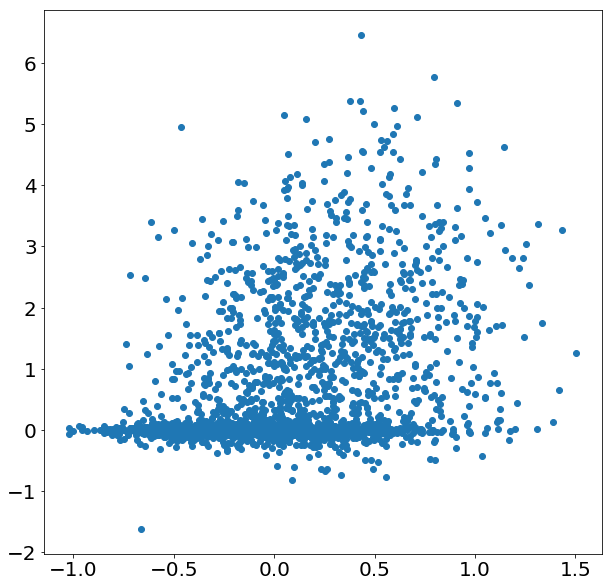

In [133]:
plt.figure(figsize=(10,10))
plt.plot(signals[np.argmax(corrs),:], fictrac['Y'],'o')

(0, 500)

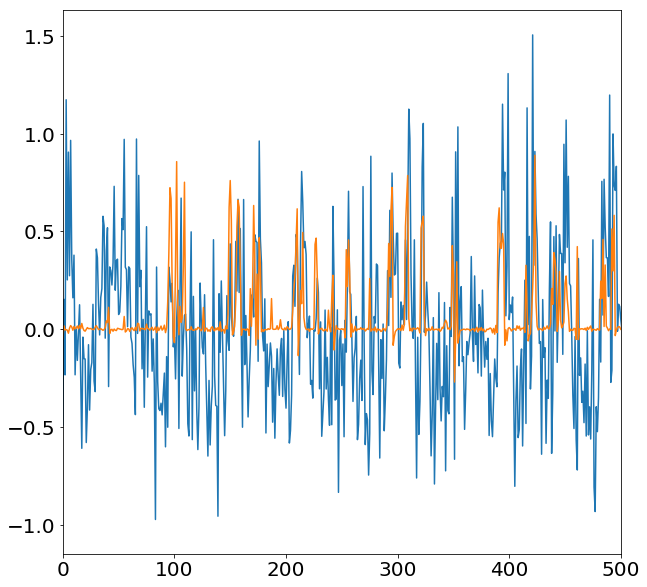

In [143]:
plt.figure(figsize=(10,10))
plt.plot(signals[np.argmax(corrs),:])
plt.plot(fictrac['Y']/6)
#plt.plot(fictrac['Z']/6)
plt.xlim(0,500)

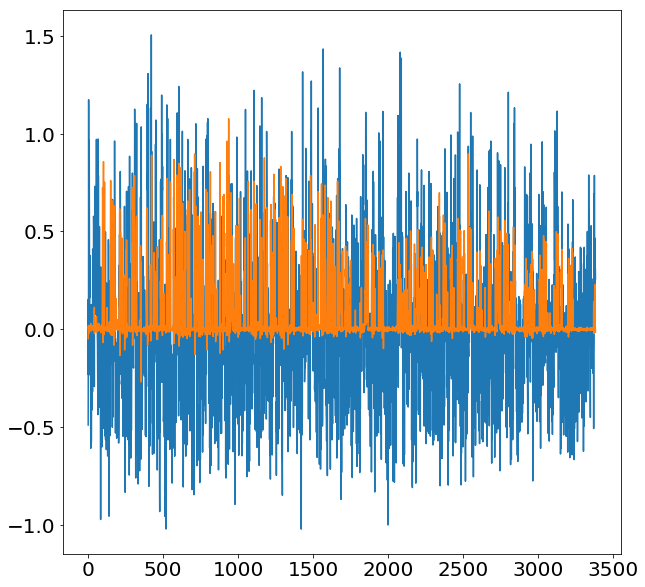

In [131]:
plt.figure(figsize=(10,10))
plt.plot(signals[np.argmax(corrs),:])
plt.plot(fictrac['Y']/6)

In [117]:
np.shape(corrs)

(2000,)

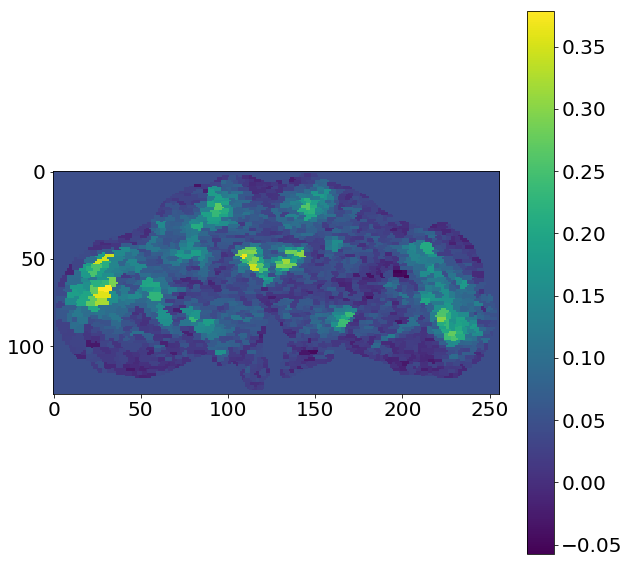

In [110]:
plt.figure(figsize=(10,10))
plt.imshow(colored_by_betas.T)
plt.colorbar()

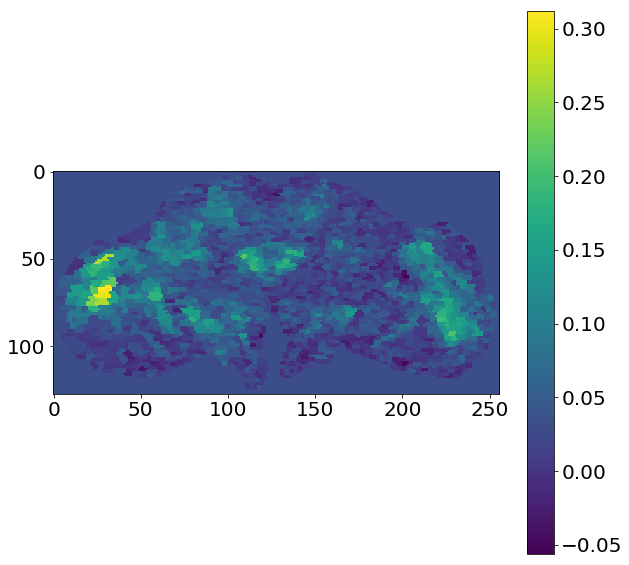

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(colored_by_betas.T)
plt.colorbar()

In [62]:
signals.shape

(500, 4731)

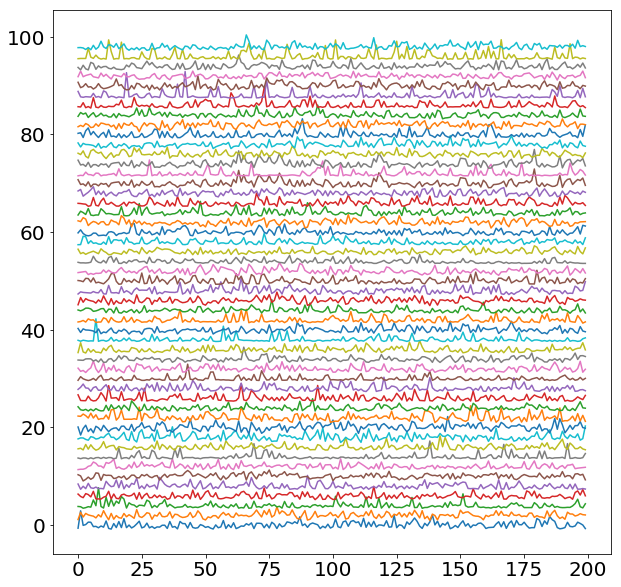

In [75]:
### quick plot
plt.figure(figsize=(10,10))
for i,cluster in enumerate(np.random.randint(0,500,50)):
    plt.plot(signals[cluster,2000:2200]+i*2);

In [ ]:
signals = []
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(model.labels_==cluster_num)[0]
    mean_signal = np.mean(one_slice[cluster_indicies,:], axis=0)
    signals.append(mean_signal)
    
signals=np.asarray(signals)

signals.shape

### quick plot
plt.figure(figsize=(10,10))
for i,cluster in enumerate(np.random.randint(0,2000,50)):
    plt.plot(signals[cluster,2000:2200]+i*2);

In [ ]:
### CLUSTER ###
n_clusters = [9856,9000,8000,7000,6000,5000,4000,3000,2000,1500,1000,750,500,100,10,1]
for cluster in n_clusters:
    model = AgglomerativeClustering(n_clusters=cluster,
                                memory=clustering_dir,
                                linkage='complete',
                                connectivity=None)
    model = model.fit(one_slice)

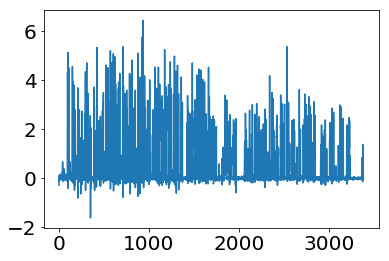

In [32]:
plt.plot(fictrac['Y'])

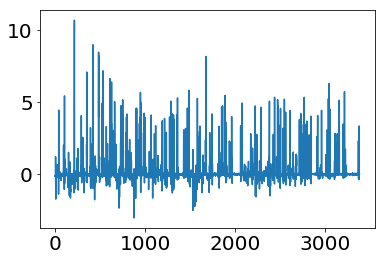

In [33]:
plt.plot(fictrac['Z'])

In [36]:
resolution = 10 #desired resolution in ms
expt_len = 1000*30*60
fps = 50 #of fictrac camera
behaviors = ['dRotLabY', 'dRotLabZ']
fictrac = {}
for behavior in behaviors:
    if behavior == 'dRotLabY': short = 'Y'
    elif behavior == 'dRotLabZ': short = 'Z'
    fictrac[short] = bbb.smooth_and_interp_fictrac(fictrac_raw,
                                                   fps,
                                                   resolution,
                                                   expt_len,
                                                   behavior,
                                                   timestamps=None,
                                                   smoothing=51)
    fictrac[short] = fictrac[short]/np.std(fictrac[short])
xnew = np.arange(0,expt_len,resolution)

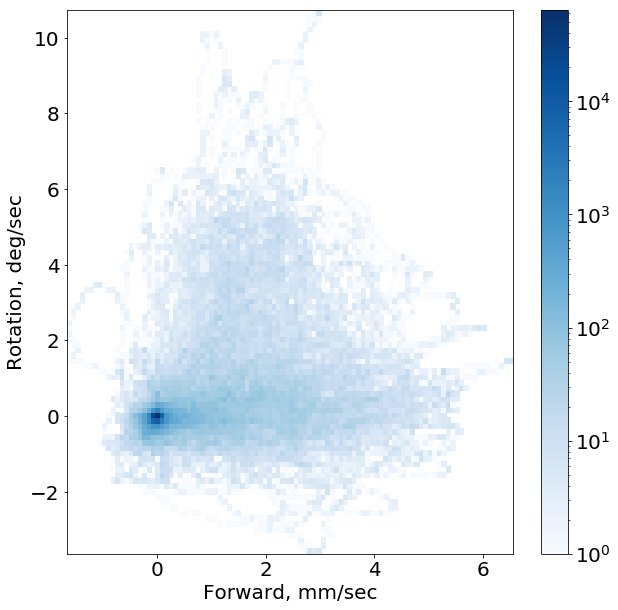

In [37]:
plt.figure(figsize=(10,10))
norm = mpl.colors.LogNorm()
plt.hist2d(fictrac['Y'],fictrac['Z'],bins=100,cmap='Blues',norm=norm);
plt.ylabel('Rotation, deg/sec')
plt.xlabel('Forward, mm/sec')
plt.colorbar()

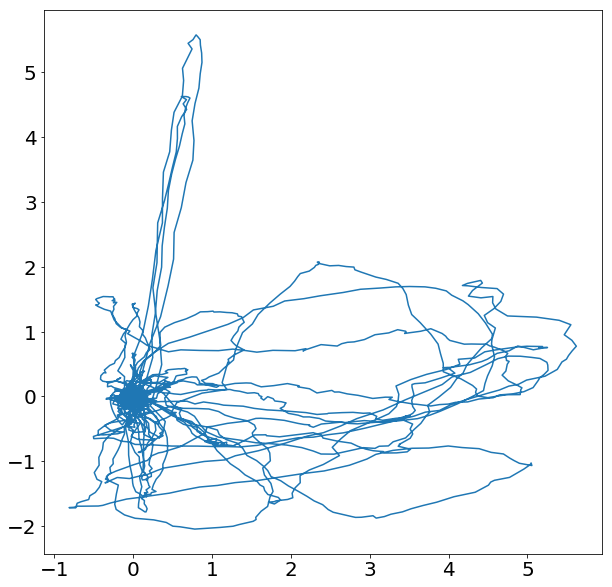

In [48]:
plt.figure(figsize=(10,10))
plt.plot(fictrac['Y'][:10000],fictrac['Z'][:10000])

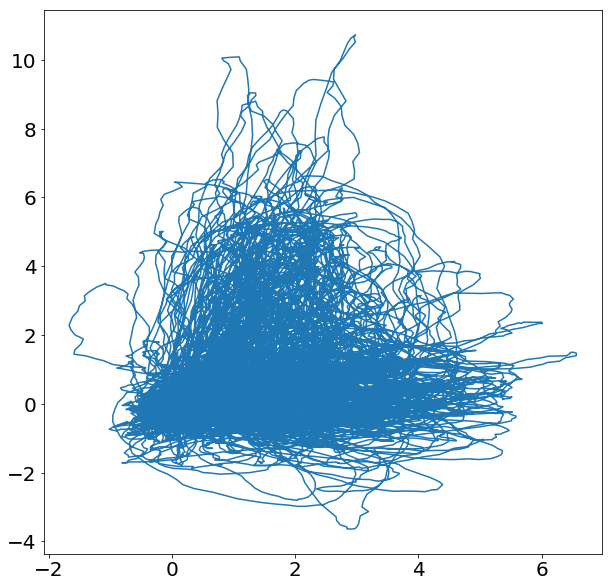

In [49]:
plt.figure(figsize=(10,10))
plt.plot(fictrac['Y'],fictrac['Z'])

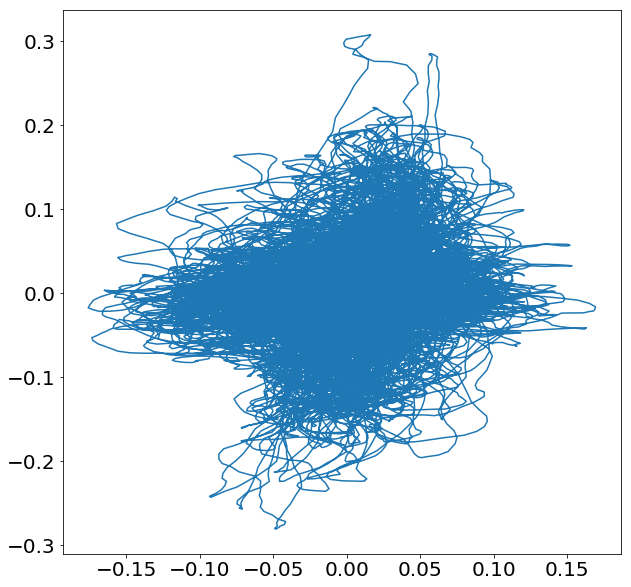

In [53]:
plt.figure(figsize=(10,10))
plt.plot(scipy.signal.savgol_filter(diff(fictrac['Y']),25,3),
         scipy.signal.savgol_filter(diff(fictrac['Z']),25,3))

In [40]:
len(fictrac['Y'])

180000

In [41]:
from numpy import diff

In [51]:
out = scipy.signal.savgol_filter(dy,25,3)

(50000, 51000)

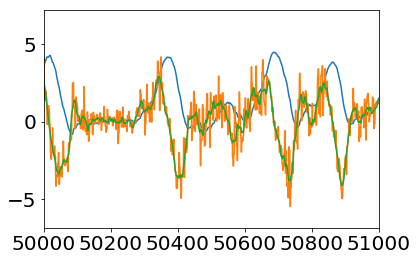

In [52]:
plt.plot(fictrac['Y'])
plt.plot(dy*30)
plt.plot(out*30)
plt.xlim(50000,51000)

In [42]:
dy = diff(fictrac['Y'])

In [ ]:
# want to make a new vector that encodes "straigness".
# 